In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, auc

In [2]:
df = pd.read_csv('/loan_data.csv')

In [3]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (9578, 14)


In [4]:
print("\nColumns in the dataset:\n", df.columns)


Columns in the dataset:
 Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')


In [5]:
print("\nData types in the dataset:\n", df.dtypes)


Data types in the dataset:
 credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object


In [6]:
print("\nHead of the dataset:\n", df.head())


Head of the dataset:
    credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0  

In [7]:
print("\nSummary statistics of the dataset:\n", df.describe())


Summary statistics of the dataset:
        credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619

In [8]:
print("\nNumber of missing values in each column:\n", df.isnull().sum())


Number of missing values in each column:
 credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


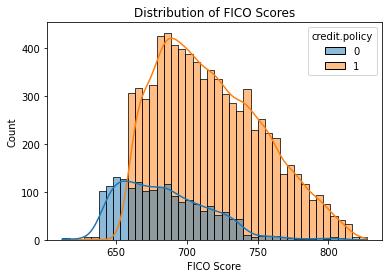

In [9]:
sns.histplot(data=df, x='fico', hue='credit.policy', kde=True)
plt.title('Distribution of FICO Scores')
plt.xlabel('FICO Score')
plt.ylabel('Count')
plt.show()

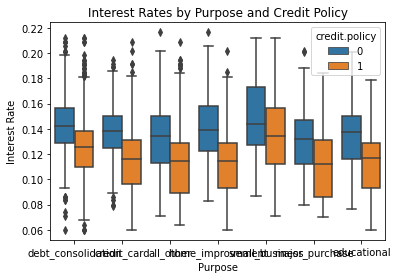

In [10]:
sns.boxplot(data=df, x='purpose', y='int.rate', hue='credit.policy')
plt.title('Interest Rates by Purpose and Credit Policy')
plt.xlabel('Purpose')
plt.ylabel('Interest Rate')
plt.show()

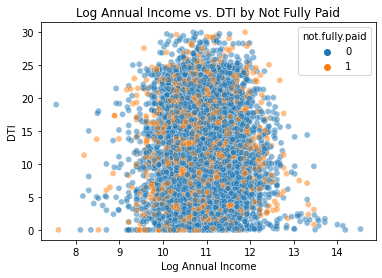

In [11]:
sns.scatterplot(data=df, x='log.annual.inc', y='dti', hue='not.fully.paid', alpha=0.5)
plt.title('Log Annual Income vs. DTI by Not Fully Paid')
plt.xlabel('Log Annual Income')
plt.ylabel('DTI')
plt.show()

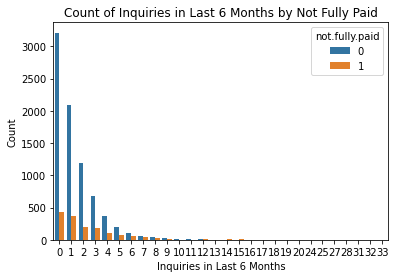

In [12]:
sns.countplot(data=df, x='inq.last.6mths', hue='not.fully.paid')
plt.title('Count of Inquiries in Last 6 Months by Not Fully Paid')
plt.xlabel('Inquiries in Last 6 Months')
plt.ylabel('Count')
plt.show()

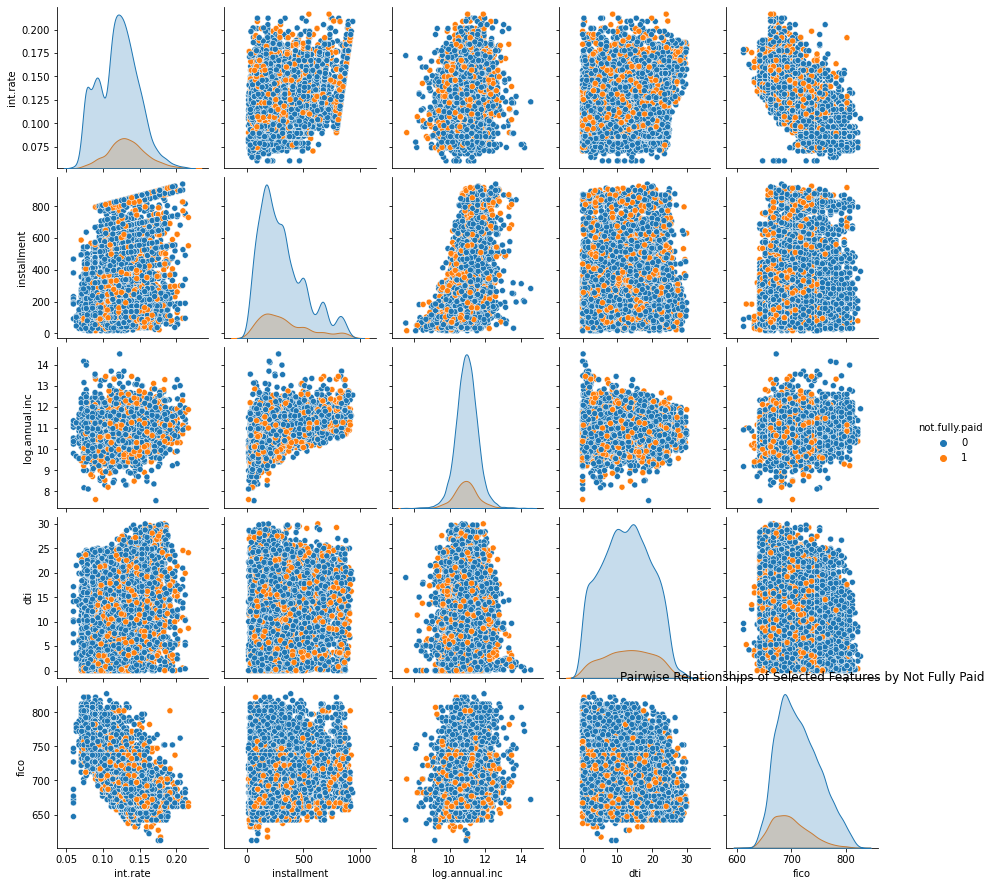

In [13]:
sns.pairplot(data=df, vars=['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico'], hue='not.fully.paid')
plt.title('Pairwise Relationships of Selected Features by Not Fully Paid')
plt.show()

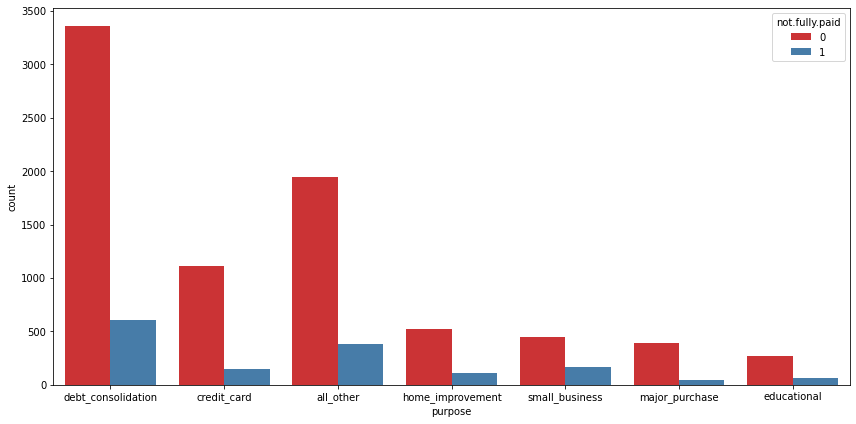

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(x='purpose',hue='not.fully.paid',data=df,palette='Set1')
plt.tight_layout()

Text(0.5, 0, 'FICO')

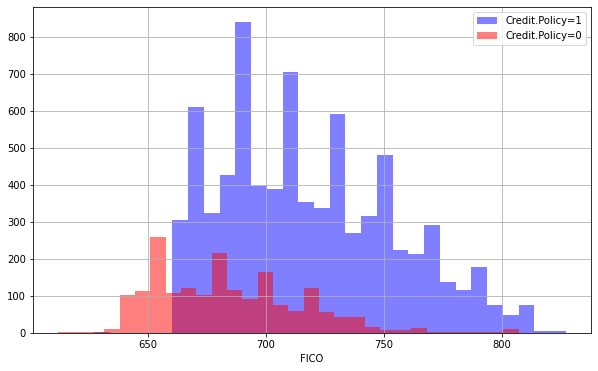

In [15]:
plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Credit.Policy=1')
df[df['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

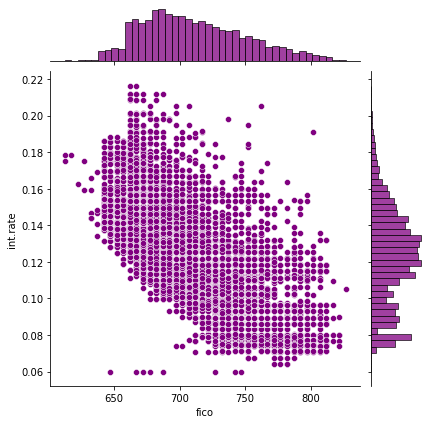

In [16]:
sns.jointplot(x='fico',y='int.rate',data=df,color='purple')

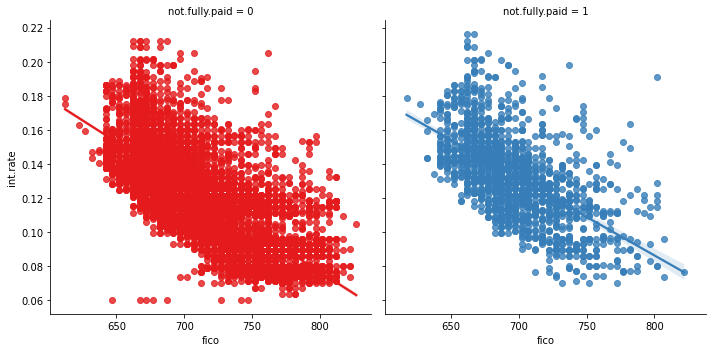

In [17]:
sns.lmplot(x='fico',y='int.rate',data=df,hue='not.fully.paid',col='not.fully.paid',palette='Set1')

In [18]:
loans = pd.get_dummies(df, columns=['purpose'], drop_first=True)

In [19]:
cat_feats = ['purpose']
final_data = pd.get_dummies(df, columns=cat_feats, drop_first=True)

In [20]:
from sklearn.model_selection import train_test_split

X = final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = dtree.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[2008  400]
 [ 369   97]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      2408
           1       0.20      0.21      0.20       466

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.74      0.73      0.74      2874



In [24]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = dtree.predict(X_test)

In [25]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      2408
           1       0.20      0.21      0.20       466

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.74      0.73      0.74      2874



In [26]:
print(confusion_matrix(y_test, predictions))

[[2008  400]
 [ 369   97]]


In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
rfc_pred = rfc.predict(X_test)

In [29]:
rfc_predictions = rfc.predict(X_test)
print(classification_report(y_test, rfc_predictions))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       0.37      0.02      0.03       466

    accuracy                           0.84      2874
   macro avg       0.60      0.51      0.47      2874
weighted avg       0.76      0.84      0.77      2874



In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, rfc_predictions))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       0.37      0.02      0.03       466

    accuracy                           0.84      2874
   macro avg       0.60      0.51      0.47      2874
weighted avg       0.76      0.84      0.77      2874



##### The precision, recall, and f1-score for class 1 (not fully paid) are very low, this means that the model is not performing well in identifying this class. This is because of class imbalance in the dataset because there is a larger number of samples in class 0 (fully paid) than in class 1 (not fully paid)



In [31]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, rfc_predictions))

[[2396   12]
 [ 459    7]]


In [32]:
dt_scores = classification_report(y_test, predictions, output_dict=True)['1']
rf_scores = classification_report(y_test, rfc_predictions, output_dict=True)['1']

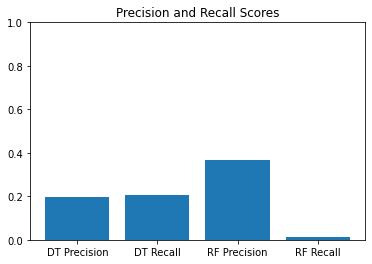

In [33]:
plt.bar(['DT Precision', 'DT Recall', 'RF Precision', 'RF Recall'],
        [dt_scores['precision'], dt_scores['recall'], rf_scores['precision'], rf_scores['recall']])
plt.title('Precision and Recall Scores')
plt.ylim(0, 1)
plt.show()

#### We can see clearly the Decision Tree performened better on average in both precision and recall, however the RF did do very well in precision but poorly in recall